In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import collections as mc
import math
MAX=float('inf')

In [2]:
def readGraph(path):
    data=np.loadtxt(path,dtype='int', delimiter=' ');
    tmp=[];
    #for item in data:
    #    tmp.append([item[1],item[0]]);
    #data=np.r_[data,tmp];
    return data
def maxtrixGraph(data):
    maxPoint=0;
    for item in data:
        maxPoint=max(maxPoint,max(item[0],item[1]));
    print(maxPoint);
    matrix=np.zeros([maxPoint+1,maxPoint+1]); 
    for i in range(maxPoint+1):
        for j in range(maxPoint+1):
            if i==j:
                matrix[i][j]=0;
            else:
                matrix[i][j]=MAX;
    for item in data:
        matrix[item[0]][item[1]]=1;
        matrix[item[1]][item[0]]=1;
    return matrix

In [3]:
def fa(x,k):
    return (x*x)/k;
def fr(x,k):
    return (0.1*k)/(x*x);
def delta(deltatmp):
    ans=math.sqrt(deltatmp[0]**2+deltatmp[1]**2);
    return ans;
def cool(t,d):
    t[0]=max(0,t[0]-d);
    t[1]=max(0,t[1]-d);
    return t;
def minPos(x,y):
    ans=[];
    ans.append(min(x[0],y[0]));
    ans.append(min(x[1],y[1]));
    return ans;
def minn(x,t):
    if x[0]<0:
        if -t[0]>x[0]:
            x[0]=t[0];
    elif x[0]>0:
        x[0]=min(x[0],t[0]);
    if x[1]<0:
        if -t[1]>x[1]:
            x[1]=t[1];
    elif x[1]>0:
        x[1]=min(x[1],t[1]);
    return x;
        

In [4]:
def FDP(W,L,data,matrix,iterations,d):
    maxInterval =300;
    maxOffset=1/10;
    minOffset=0;
    attenuation = 10;#力衰减
    
    area=W*L;
    maxPoint=0;
    Vnum=0;
    V=[];
    for item in data:
        maxPoint=max(maxPoint,max(item[0],item[1]));
    t=[]
    t.append(W/100);
    t.append(L/100);
    
    used_node = [False] * (maxPoint+1);
    for item in data:
        if used_node[item[0]]==False:
            V.append(item[0]);
            used_node[item[0]]=True;
            Vnum=Vnum+1;
        if used_node[item[1]]==False:
            V.append(item[1]);
            used_node[item[0]]=True;
            Vnum=Vnum+1;
    k=math.sqrt(area/Vnum);
    print(k);
    pos=np.random.random((maxPoint+1,2));
    
    pos[:,0]=pos[:,0]*W-W/2;
    pos[:,1]=pos[:,1]*L-L/2;
    print(pos)
    disp=np.zeros((maxPoint+1,2));
    for i in range(iterations):
        #
        ejectFactor = 6;
        condenseFactor = 3
        for v in V:
            disp[v][0]=0;disp[v][1]=0;
        for v in V:
            for u in V:
                if (pos[v][0]!=pos[u][0]) and (pos[v][1]!=pos[u][1]):
                    tmpdelta=pos[v]-pos[u];
                    disp[v]=disp[v]+(tmpdelta/delta(tmpdelta))*fr(delta(tmpdelta),k);
        
        #for v in V:
        #    disp[v][0]=0;disp[v][1]=0;
         #   for u in V:
         #       if (u!=v) and (matrix[u][v]==1) and (pos[v][0]!=pos[u][0]) and (pos[v][1]!=pos[u][1]):
         #           tmpdelta=pos[v]-pos[u];
         #           disp[v]=disp[v]+(tmpdelta/delta(tmpdelta))*fr(delta(tmpdelta),k);
        
        for e in data:
            tmpdelta=pos[item[0]]-pos[item[1]];
            v=e[0];
            u=e[1];
            if (tmpdelta[0]!=0) and (tmpdelta[1]!=0):
                disp[v]=disp[v]-(tmpdelta/delta(tmpdelta))*fa(delta(tmpdelta),k);
                disp[u]=disp[u]+(tmpdelta/delta(tmpdelta))*fa(delta(tmpdelta),k);
        
        for v in V:
            
            if disp[v][0]>W/1000:
                disp[v][0]=W/1000;
            elif disp[v][0]<-W/1000:
                disp[v][0]=-W/1000;
                
            if disp[v][1]>L/1000:
                disp[v][1]=L/1000;
            elif disp[v][1]<-L/1000:
                disp[v][1]=-L/1000;
            pos[v]=pos[v]+minn(disp[v],t);
            pos[v][0] = min(W/2, max(-W/2, pos[v][0]));
            pos[v][1] = min(L/2, max(-L/2, pos[v][1]));
        #print(disp)
        t=cool(t,d);
        
        #print(disp);
        ans=pos
        #plt.figure(figsize=(32,32))
        #plt.axis('equal')
        #ax = plt.axes()
        #ax.set_xlim(min(ans[:,0]), max(ans[:,0]))
        #ax.set_ylim(min(ans[:,1]), max(ans[:,1]))

        #lines = []
        #for item in data:
        #    lines.append([ans[item[0]],ans[item[1]]]);
        #    plt.plot(ans[item[0]][0],ans[item[0]][1],'ro');
        #    plt.plot(ans[item[1]][0],ans[item[1]][1],'ro');
        #lc = mc.LineCollection(lines, linewidths=.3, colors='#0000007f')
        #ax.add_collection(lc)
        #plt.savefig('../result/' + "ans" + '.pdf', dpi=1000)
        #plt.show()
    return pos;

In [5]:
file_name = 'test6.txt' 
data = readGraph(file_name);
matrix=maxtrixGraph(data);

5


In [6]:
ans = FDP(320,320,data,matrix,100,0.01);
print(ans);

71.55417527999327
[[-123.86842866 -157.36650468]
 [ 104.42821199  -32.71597344]
 [ -66.34658948 -147.08838676]
 [  62.27283785  131.56953237]
 [  22.03795251  -41.11833788]
 [ -32.70253795  -28.80947377]]
[[-150.14018276 -131.22563274]
 [  51.76145305   19.89583176]
 [-145.26930457  -68.06478862]
 [ 160.           27.20548292]
 [ 153.42822452 -160.        ]
 [  98.62474782 -160.        ]]


<ipython-input-7-0dd8899a13f1>:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


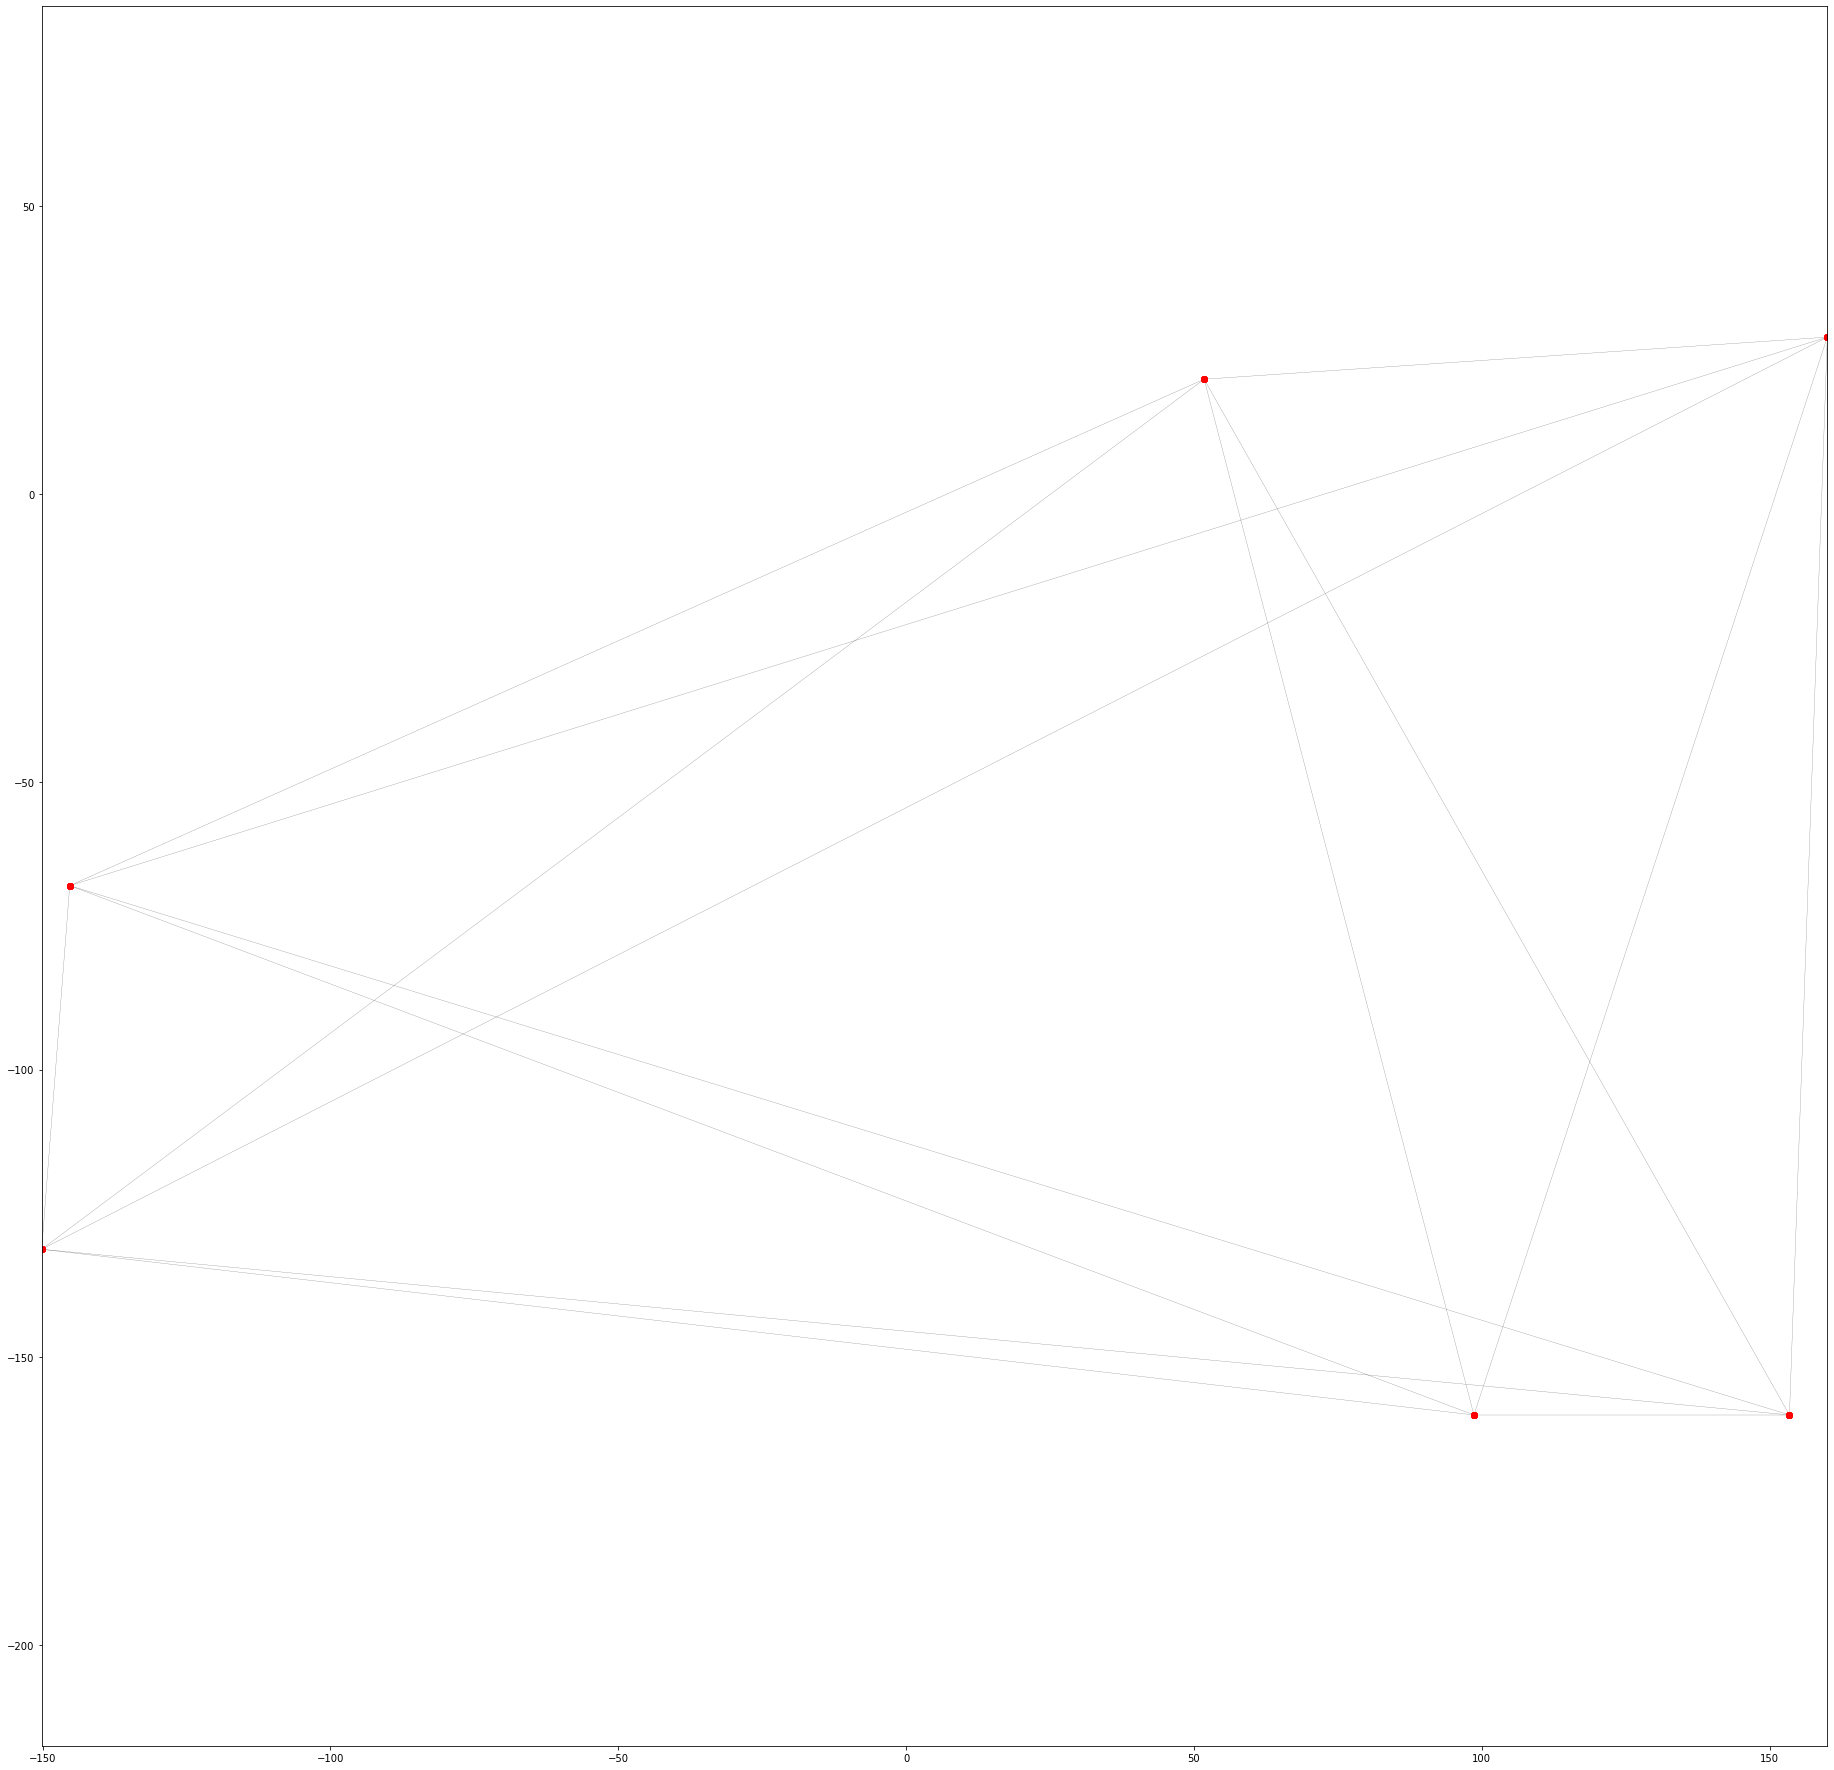

In [7]:
plt.figure(figsize=(32,32))
plt.axis('equal')
ax = plt.axes()
ax.set_xlim(min(ans[:,0]), max(ans[:,0]))
ax.set_ylim(min(ans[:,1]), max(ans[:,1]))

lines = []
for item in data:
    lines.append([ans[item[0]],ans[item[1]]]);
    plt.plot(ans[item[0]][0],ans[item[0]][1],'ro');
    plt.plot(ans[item[1]][0],ans[item[1]][1],'ro');
lc = mc.LineCollection(lines, linewidths=.3, colors='#0000007f')
ax.add_collection(lc)
#plt.savefig('../result/' + "ans" + '.pdf', dpi=1000)
plt.show()